Link Dataset: [Red Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [197]:
wine_df = pd.read_csv('winequality-red.csv')

In [198]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Variabel Dependent & Variabel Independent

Variabe Dependent:

1.   Quality



Variabel Independent:


1.   Fixed Acidity
2.   Volatile Acidity
1.   Citric Acid
2.   Residual Sugar
1.   Chlorides
1.   Free Sulfur Dioxide
1.   Total Sulfur Dioxide
2.   Density
2.   pH
2.   Sulphates
1.   Alcohol











# Eksplorasi & Visualisasi Data

In [199]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [200]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [246]:
wine_df.shape

(1599, 12)

In [29]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


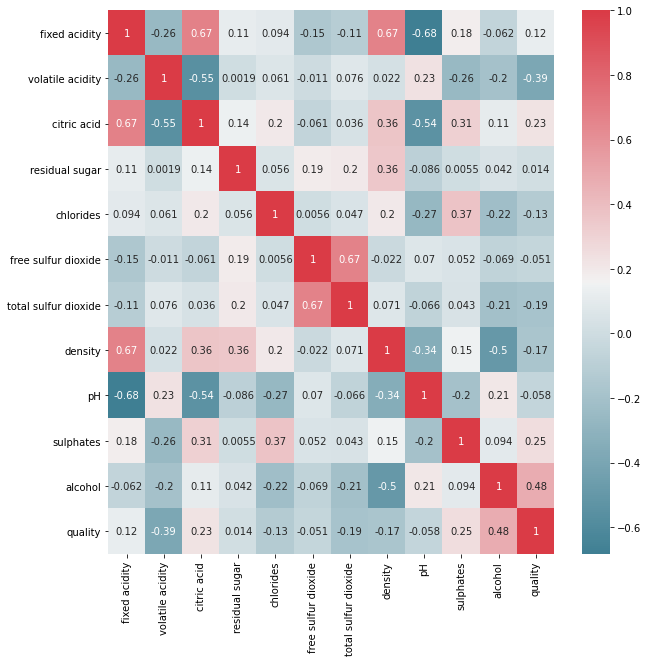

In [38]:
#visualisasi data dengan heatmap
plt.figure(figsize=(10,10))
corr = wine_df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            annot=True)

# Data Analisis serta Pembersihan Data dari Outlier dan Missing Data

In [247]:
#data cleaning from missing value
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

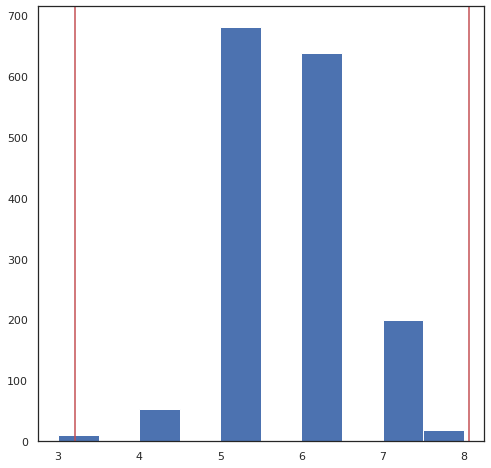

In [205]:
#cek outlier
mean = wine_df['quality'].mean()
std = wine_df['quality'].std()

limit = 3*std
limit_atas = mean + 3*std
limit_bawah = mean - 3*std

fig, ax=plt.subplots(figsize=(8,8))
ax.hist(wine_df['quality'], bins=10)
ax.axvline(limit_atas, color='r')
ax.axvline(limit_bawah, color='r')
plt.show()

In [206]:
(wine_df['quality'] < limit_bawah).sum()

10

In [207]:
(wine_df['quality'] > limit_atas).sum()

0

In [208]:
wine_df2 = wine_df[(wine_df['quality'] > limit_bawah) & (wine_df['quality'] < limit_atas)]

In [209]:
wine_df2.shape

(1589, 12)

# Pemodelan Regresi (Linear dan Berganda)

Linear Regression

In [64]:
# seleksi fitur dengan korelasi
korelasi = wine_df2.corr()['quality'].drop('quality')
print(korelasi)

fixed acidity           0.129306
volatile acidity       -0.370254
citric acid             0.224687
residual sugar          0.015713
chlorides              -0.118492
free sulfur dioxide    -0.062561
total sulfur dioxide   -0.206025
density                -0.173642
pH                     -0.047960
sulphates               0.249791
alcohol                 0.484746
Name: quality, dtype: float64


In [212]:
X = wine_df2['alcohol'].values.reshape(-1,1)
y = wine_df2['quality'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'quality')

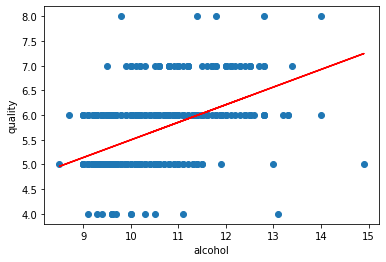

In [134]:
y_pred_test = linearReg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, c='r')
plt.xlabel('alcohol')
plt.ylabel('quality')

In [248]:
# y_pred_train = linearReg.predict(X_train)
# plt.scatter(X_train, y_train)
# plt.plot(X_train, y_pred_train, c='r')
# plt.xlabel('alcohol')
# plt.ylabel('quality')

Evaluasi Pemodelan Regresi Linear

In [214]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred_test, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_pred_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred_test, y_test)))

print('Alcohol linear regression coef :', linearReg.coef_)
print('Alcohol linear regression intercept:', linearReg.intercept_)
print('Alcohol linear regression coef correlation:', linearReg.score(X_test, y_test))

Mean Absolute Error: 0.7188584212023975
Mean Squared Error: 0.7698011694358372
Root Mean Squared Error: 0.8773831371959671
Alcohol linear regression coef : [[0.34760063]]
Alcohol linear regression intercept: [2.00997619]
Alcohol linear regression coef correlation: 0.2609415387045475


Multiple Regression

In [215]:
X_mulReg = wine_df2[['citric acid', 'sulphates', 'alcohol']]
y_mulReg = wine_df2['quality']

X_train, X_test, y_train, y_test = train_test_split(X_mulReg, y_mulReg, test_size=0.25)
mulReg = LinearRegression()
mulReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [216]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred_test, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_pred_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred_test, y_test)))

Mean Absolute Error: 0.7540792393361351
Mean Squared Error: 0.8546022268508533
Root Mean Squared Error: 0.924446984337584


Analisis Multiple Regression

In [217]:
print('Multiple regression coef :', mulReg.coef_)
print('Multiple regression intercept:', mulReg.intercept_)
print('Multiple regression coef correlation:', mulReg.score(X_mulReg_test, y_mulReg_test))

Multiple regression coef : [0.41193025 0.71685403 0.33548156]
Multiple regression intercept: 1.5614468865144184
Multiple regression coef correlation: 0.2864671020330194


# Regresi Logistik

Binning 3 Kelas

In [191]:
# wine_df2['quality'].replace(np.nan, -1, inplace=True)
# wine_df2['quality'] = wine_df2['quality'].astype(int, copy=True)
# wine_df2['quality'].replace(-1, np.nan, inplace=True)

In [218]:
bin = np.linspace(min(wine_df2['quality']), max(wine_df2['quality']), 4)

In [219]:
kategori = ['Kurang', 'Sedang', 'Bagus']

In [ ]:
wine_df2['quality-groups'] = pd.cut(wine_df2['quality'], bin, labels=kategori,include_lowest=True)

In [231]:
wine_df2.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-groups
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Kurang
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Kurang
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Kurang
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Sedang
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Kurang
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Kurang
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Kurang
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Bagus
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Bagus
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Kurang


In [233]:
wine_df2['quality-groups'].value_counts()

Kurang    734
Sedang    638
Bagus     217
Name: quality-groups, dtype: int64

Regresi Logistik

In [234]:
label = [1, 2, 3]

In [ ]:
wine_df2['quality-groups'] = pd.cut(wine_df2['quality'], bin, labels=label,include_lowest=True)

In [236]:
wine_df2.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality-groups
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,3
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,3
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [237]:
wine_df2['quality-groups'].value_counts()

1    734
2    638
3    217
Name: quality-groups, dtype: int64

In [238]:
X_logReg = wine_df2[['sulphates', 'alcohol']]
y_logReg = wine_df2['quality-groups']

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_logReg, y_logReg, test_size=0.25)
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
logReg_pred = logReg.predict(X_train)

In [174]:
accuracy_log_test = logReg.score(X_test,y_test)
print(accuracy_log_test)

0.585427135678392


In [244]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, logReg_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, logReg_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, logReg_pred)))

Mean Absolute Error: 0.4265323257766583
Mean Squared Error: 0.473551637279597
Root Mean Squared Error: 0.688150882641007


Analisis Regression Logistic

In [245]:
print('Logistic regression coef :', logReg.coef_)
print('Logistic regression intercept:', logReg.intercept_)
print('Logistic regression coef correlation:', logReg.score(X_test, y_test))

Logistic regression coef : [[-1.85652822 -0.8511563 ]
 [-0.09508117  0.02472465]
 [ 1.95160939  0.82643166]]
Logistic regression intercept: [ 10.64516152   0.39373438 -11.0388959 ]
Logistic regression coef correlation: 0.5904522613065326
